In [318]:
import pandas as pd
import numpy as n
import random
import math
import matplotlib.pyplot as plt

## MELIHAT DATA

Pada proses ini dilakukan load terhadap data fitur GLCM dari file CSV dan ditampilkan lima baris pertama.

In [311]:
ct_data = pd.read_csv("GLCM_Covid.csv");
ct_data.head()

,label,CONTRAST0,HOMOGENITY0,ENTROPY0,ENERGY0,CONTRAST45,HOMOGENITY45,ENTROPY45,ENERGY45,CONTRAST90,HOMOGENITY90,ENTROPY90,ENERGY90,CONTRAST135,HOMOGENITY135,ENTROPY135,ENERGY135
0,1,4.552288,0.644010,3.614979,0.064522,5.095604,0.625877,3.652356,0.061951,2.174151,0.688930,3.455847,0.070650,5.091636,0.630201,3.652590,0.062272
1,1,3.300935,0.784967,3.011608,0.173187,5.322401,0.753999,3.127794,0.164812,4.346580,0.770280,3.072447,0.168263,5.823920,0.748377,3.145396,0.163226
2,1,3.328125,0.785723,2.971865,0.182995,5.372869,0.754217,3.086182,0.175032,4.362943,0.770463,3.032681,0.178490,5.849836,0.751010,3.097675,0.173615
3,1,3.432579,0.786071,2.945866,0.189870,5.390663,0.755853,3.051266,0.182225,4.253875,0.774015,2.994296,0.186306,5.711513,0.754291,3.060028,0.181271
4,1,3.374446,0.779573,2.947369,0.200533,5.000062,0.755515,3.034623,0.194259,3.779897,0.774639,2.965557,0.198529,5.296671,0.753300,3.043882,0.192846


## MEMERIKSA DATA

Mengecek informasi mengenai data, meliputi jumlah kolom, jumlah data, dan tipe data.

In [312]:
ct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
label            200 non-null int64
CONTRAST0        200 non-null float64
HOMOGENITY0      200 non-null float64
ENTROPY0         200 non-null float64
ENERGY0          200 non-null float64
CONTRAST45       200 non-null float64
HOMOGENITY45     200 non-null float64
ENTROPY45        200 non-null float64
ENERGY45         200 non-null float64
CONTRAST90       200 non-null float64
HOMOGENITY90     200 non-null float64
ENTROPY90        200 non-null float64
ENERGY90         200 non-null float64
CONTRAST135      200 non-null float64
HOMOGENITY135    200 non-null float64
ENTROPY135       200 non-null float64
ENERGY135        200 non-null float64
dtypes: float64(16), int64(1)
memory usage: 26.6 KB


## VISUALISASI DATA

Visualisasi sederhanan dari data yang ada beserta korelasi antara masing-masing variabel data.

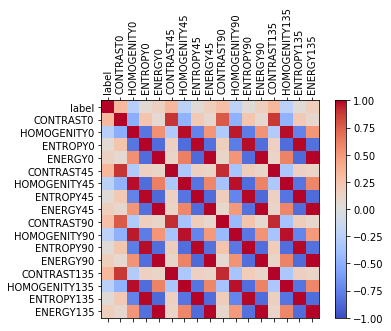

In [360]:
corr = ct_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = n.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

## MEMECAH DATA

Proses membagi data menjadi data training dan data test secara random. Keseluruhan data berjumlah 200 entri, diambil 70% atau sebanyak 140 data sebagai data train, dan sisanya menjadi data test.

In [313]:
a=random.sample(range(0,200), 140)
b = []
for i in range(100):
    if(i not in a):
        b.append(i)
train=ct_data.loc[a]
train.head()

,label,CONTRAST0,HOMOGENITY0,ENTROPY0,ENERGY0,CONTRAST45,HOMOGENITY45,ENTROPY45,ENERGY45,CONTRAST90,HOMOGENITY90,ENTROPY90,ENERGY90,CONTRAST135,HOMOGENITY135,ENTROPY135,ENERGY135
180,0,4.841781,0.730524,3.287781,0.122773,7.498667,0.688781,3.418468,0.110849,5.436147,0.708064,3.341709,0.116336,7.930808,0.680257,3.442053,0.108959
103,1,2.809670,0.719403,3.441186,0.057830,3.679583,0.686861,3.529520,0.054476,2.015379,0.716764,3.408229,0.058855,3.621551,0.682152,3.533867,0.054164
154,0,3.682579,0.725910,3.543467,0.056443,4.656829,0.703814,3.616673,0.052934,2.293861,0.755922,3.423196,0.061204,4.411929,0.703617,3.613588,0.053188
136,1,2.960568,0.835470,2.630662,0.205772,5.467605,0.801350,2.759491,0.195272,4.380906,0.822989,2.684429,0.202390,5.690309,0.798097,2.764127,0.195911
132,1,9.529589,0.480160,4.468713,0.021151,10.037076,0.473658,4.499611,0.020483,8.861282,0.470389,4.444913,0.021212,9.952942,0.468789,4.507581,0.020322


In [314]:
test=ct_data.loc[b]
test.head()

,label,CONTRAST0,HOMOGENITY0,ENTROPY0,ENERGY0,CONTRAST45,HOMOGENITY45,ENTROPY45,ENERGY45,CONTRAST90,HOMOGENITY90,ENTROPY90,ENERGY90,CONTRAST135,HOMOGENITY135,ENTROPY135,ENERGY135
1,1,3.300935,0.784967,3.011608,0.173187,5.322401,0.753999,3.127794,0.164812,4.346580,0.770280,3.072447,0.168263,5.823920,0.748377,3.145396,0.163226
3,1,3.432579,0.786071,2.945866,0.189870,5.390663,0.755853,3.051266,0.182225,4.253875,0.774015,2.994296,0.186306,5.711513,0.754291,3.060028,0.181271
4,1,3.374446,0.779573,2.947369,0.200533,5.000062,0.755515,3.034623,0.194259,3.779897,0.774639,2.965557,0.198529,5.296671,0.753300,3.043882,0.192846
8,1,6.564038,0.719145,2.927443,0.191834,8.077376,0.707700,2.965871,0.186938,4.964628,0.724338,2.888036,0.193275,7.694587,0.706843,2.961774,0.186946
15,1,2.442544,0.680046,3.327124,0.087363,2.997458,0.653838,3.401245,0.081466,1.846149,0.678350,3.293402,0.084586,3.074834,0.646190,3.413907,0.079577


## FITTING DAN PREDIKSI

Melakukan prediksi pada setiap data test menggunakan data train yang ada, dengan menggunakan algoritma KNN, diawali dengan kalkulasi jarak menggunakan Euclidean Distance, kemudian memprediksi kelas berdasarkan jumlah K tertentu.

In [356]:
tp = 0
fp = 0 
fn = 0
tn = 0
for itr in range(len(test)):
    coba = test.iloc[itr]
    cd = coba.drop(["label"])
    cobalabel = coba.label
    distance = []
    for row in train.itertuples():
        d = math.sqrt( (pow(row[2]-cd[0], 2)) + (pow(row[3]-cd[1], 2)) + (pow(row[4]-cd[2], 2)) + (pow(row[5]-cd[3], 2)) + 
                  (pow(row[6]-cd[4], 2)) + (pow(row[7]-cd[5], 2)) + (pow(row[8]-cd[6], 2)) + (pow(row[9]-cd[7], 2)) + 
                  (pow(row[10]-cd[8], 2)) + (pow(row[11]-cd[9], 2)) + (pow(row[12]-cd[10], 2)) + (pow(row[13]-cd[11], 2)) + 
                  (pow(row[14]-cd[12], 2)) + (pow(row[15]-cd[13], 2)) + (pow(row[16]-cd[14], 2)) + (pow(row[17]-cd[15], 2)) )
        distance.append((d,row[1]))
    distance.sort()
    neighbor = []
    K = 3
    for itr in range(K):
        neighbor.append(distance[itr][1])
    cov = neighbor.count(1)
    non = neighbor.count(0)
    if(cov>non):
        if(cobalabel==1):
            tp +=1
        else:
            fp +=1
    else:
        if(cobalabel==0):
            tn +=1
        else:
            fn +=1

## CONFUSION MATRIX

In [371]:
print("True Positive:", tp)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Negative:", tn)

True Positive: 9
False Positive: 0
False Negative: 6
True Negative: 9


## EVALUASI HASIL 

Menggunakan nilai-nilai dari confusion matrix, dilakukan perhitungan terhadap accuracy, precision, recall, dan F1 dari hasil klasifikasi KNN.

In [357]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2 * ( (precision*recall) / (precision+recall) )
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 score:", f1*100)

Accuracy: 75.0
Precision: 100.0
Recall: 60.0
F1 score: 74.99999999999999


In [373]:
K = 5
for itr in range(K):
    neighbor.append(distance[itr][1])
cov = neighbor.count(1)
non = neighbor.count(0)
if(cov>non):
    if(cobalabel==1):
        tp +=1
    else:
        fp +=1
else:
    if(cobalabel==0):
        tn +=1
    else:
        fn +=1
accuracy1 = (tp + tn) / (tp + tn + fp + fn)
K = 7
for itr in range(K):
    neighbor.append(distance[itr][1])
cov = neighbor.count(1)
non = neighbor.count(0)
if(cov>non):
    if(cobalabel==1):
        tp +=1
    else:
        fp +=1
else:
    if(cobalabel==0):
        tn +=1
    else:
        fn +=1
accuracy2 = (tp + tn) / (tp + tn + fp + fn)

## VISUALISASI HASIL

Menampilkan korelasi antara jumlah K dengan akurasi klasifikasi.

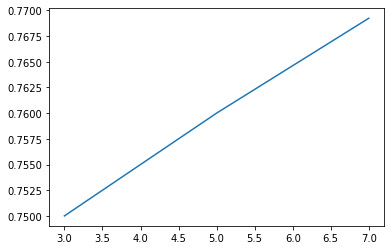

In [374]:
ttg = [3,5,7]
acc = [accuracy, accuracy1, accuracy2]
plt.plot(ttg, acc)
plt.show()